## import libraries

In [26]:
pip install sklearn

Using legacy setup.py install for sklearn, since package 'wheel' is not installed.
    Running setup.py install for sklearn: started
    Running setup.py install for sklearn: finished with status 'done'
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\users\chris\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pylab as pl
%matplotlib inline

## import data and visualize

In [9]:
df = pd.read_csv("salary_data.csv")

In [11]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


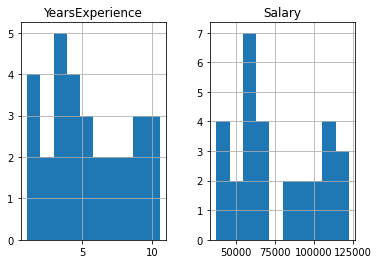

In [14]:
df.hist()
plt.show()

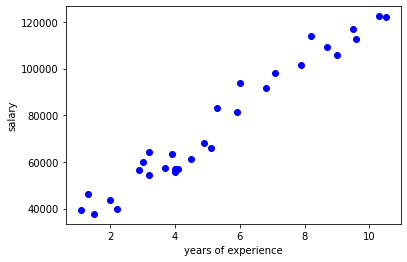

In [15]:
plt.scatter(df.YearsExperience, df.Salary, color='blue')
plt.xlabel("years of experience")
plt.ylabel("salary")
plt.show()

## split data into training and testing set

In [22]:
msk = np.random.rand(len(df)) < 0.8
train = df[msk]
test = df[~msk]

## model data using sklearn

In [28]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['YearsExperience']])
train_y = np.asanyarray(train[['Salary']])
regr.fit(train_x, train_y)

print('coefficient: ', regr.coef_)
print('intercept: ', regr.intercept_)

coefficient:  [[9426.03527734]]
intercept:  [26514.32091483]


## plot fit line

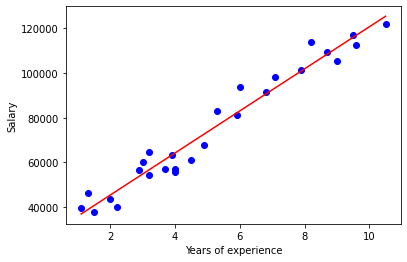

In [29]:
plt.scatter(train.YearsExperience, train.Salary, color='blue')
plt.plot(train_x, regr.coef_[0][0] * train_x + regr.intercept_[0], '-r')

plt.xlabel("Years of experience")
plt.ylabel("Salary")
plt.show()

## evaluate results with testing set

In [31]:
from sklearn.metrics import r2_score
test_x = np.asanyarray(test[['YearsExperience']])
test_y = np.asanyarray(test[['Salary']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

Mean absolute error: 5949.88
Residual sum of squares (MSE): 46665414.42
R2-score: 0.94
